<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-3-nov2021/blob/main/2_a_ML_Ejemplo_Clusterizacion_alumnos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [367]:
n_alumnos = 60

In [368]:
Lengua=5+5*(np.random.rand(n_alumnos))
Lengua

array([6.81866055, 5.01101465, 7.16575911, 5.61179157, 9.51800957,
       6.35719391, 8.15856028, 7.00150206, 7.8934881 , 8.15385172,
       6.66798771, 8.74515389, 9.21491745, 6.09870523, 7.24341624,
       8.88076277, 8.91784464, 8.31142476, 7.79058896, 7.17063856,
       6.87458369, 6.82680437, 6.14821733, 5.24413413, 6.69767494,
       6.9972865 , 7.05674346, 5.26905   , 8.3666845 , 9.06755405,
       7.43933021, 5.9934794 , 9.39212894, 5.82223983, 9.19527559,
       7.5992109 , 5.59898724, 8.19471142, 6.14335656, 6.26371773,
       8.24216801, 5.611978  , 9.07872865, 6.17245486, 8.42226858,
       8.78656012, 7.74343507, 5.57382341, 8.91611361, 9.95694845,
       6.89798774, 5.83241559, 8.92881894, 5.83912778, 6.12595706,
       7.05730081, 8.30966882, 6.16009205, 7.54575298, 9.16570489])

In [369]:
Matematicas=5+5*(np.random.rand(n_alumnos))
Matematicas

array([8.47161841, 5.24826616, 6.20346628, 9.99940274, 6.60464986,
       6.4115937 , 7.38587346, 7.76379922, 9.81444698, 8.94713118,
       9.17258657, 9.2806466 , 8.03351189, 9.02349406, 5.00875172,
       6.2562725 , 9.10832842, 6.90892283, 8.21401916, 5.82000544,
       5.66841115, 8.78678052, 6.69743049, 9.05592605, 9.55365001,
       9.71085486, 6.17880429, 5.78584478, 8.16479684, 6.86447062,
       9.93380842, 7.38034196, 9.07143516, 6.52518367, 8.58660637,
       9.28709474, 8.49579931, 7.85363058, 7.95356128, 8.41917247,
       5.52560652, 5.04730122, 9.2033941 , 5.64740972, 5.4073047 ,
       6.60307719, 7.06448226, 6.91042867, 9.96118965, 8.35078214,
       6.9179681 , 7.13342141, 6.53524695, 9.21888354, 8.44474378,
       5.68290301, 5.21631611, 7.42029897, 9.54824968, 6.95188957])

Text(0, 0.5, 'Matemáticas')

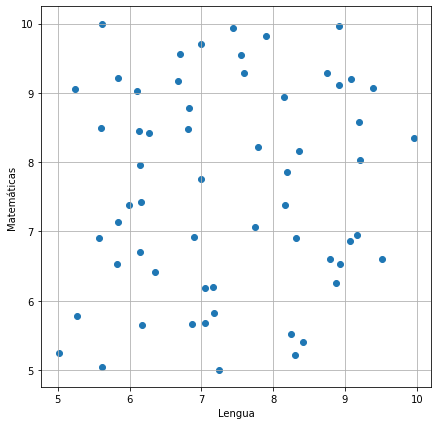

In [370]:
plt.figure(figsize=(7,7))
plt.scatter(Lengua, Matematicas)
plt.grid()
plt.xlabel('Lengua')
plt.ylabel('Matemáticas')

In [371]:
np.arange(1,n_alumnos+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [372]:
X=pd.DataFrame(index=np.arange(1,n_alumnos+1))

In [373]:
X['Lengua']=Lengua

In [374]:
X['Matemáticas']=Matematicas

In [375]:
X.head()

,Lengua,Matemáticas
1,6.818661,8.471618
2,5.011015,5.248266
3,7.165759,6.203466
4,5.611792,9.999403
5,9.518010,6.604650


In [376]:
X.to_excel('sample_data/notas_alumnos.xlsx')

In [377]:
X=pd.read_excel('sample_data/notas_alumnos.xlsx', index_col=0)

In [378]:
X.head()

,Lengua,Matemáticas
1,6.818661,8.471618
2,5.011015,5.248266
3,7.165759,6.203466
4,5.611792,9.999403
5,9.518010,6.604650


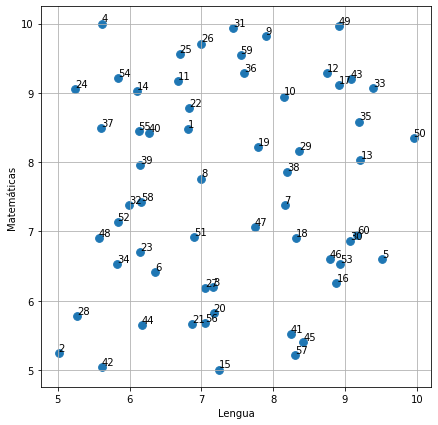

In [379]:
plt.figure(figsize=(7,7))
plt.scatter(X['Lengua'],X['Matemáticas'], s=60)
plt.grid()
plt.xlabel('Lengua')
plt.ylabel('Matemáticas')
for i in range(len(X)):
  plt.text(X['Lengua'].iloc[i], X['Matemáticas'].iloc[i], s=str(i+1), ha='left', va='bottom')

In [380]:
n_grupos = 3

kmeans = KMeans(n_clusters=n_grupos, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [381]:
X_clasificado = X.copy()
X_clasificado['Grupo'] = kmeans.labels_

In [382]:
X_clasificado.head()

,Lengua,Matemáticas,Grupo
1,6.818661,8.471618,2
2,5.011015,5.248266,0
3,7.165759,6.203466,0
4,5.611792,9.999403,2
5,9.518010,6.604650,1


In [383]:
X_clasificado['Grupo'].value_counts().sort_index()

0    21
1    21
2    18
Name: Grupo, dtype: int64

No handles with labels found to put in legend.


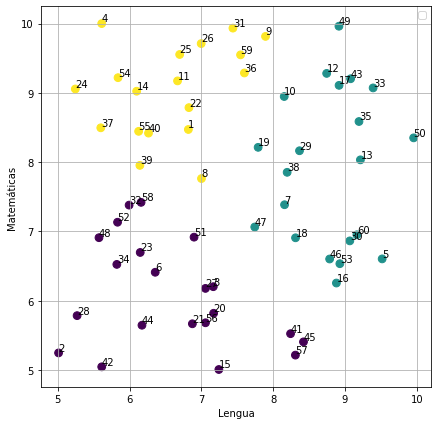

In [384]:
plt.figure(figsize=(7,7))
plt.scatter(X_clasificado['Lengua'],X_clasificado['Matemáticas'],c=X_clasificado['Grupo'], s=60)
plt.grid()
plt.xlabel('Lengua')
plt.ylabel('Matemáticas')
for i in range(len(X_clasificado)):
  plt.text(X_clasificado['Lengua'].iloc[i], X_clasificado['Matemáticas'].iloc[i], s=str(i+1), ha='left', va='bottom')
plt.legend()

In [385]:
kmeans.score(X)

-79.51904635106217

In [386]:
scores=[]
for k in range(2,8):
  kmeans= KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  scores.append([k,kmeans.score(X)])
scores

[[2, -129.29391570836447],
 [3, -79.51904635106217],
 [4, -52.23201832175893],
 [5, -43.02915026704878],
 [6, -34.99123547043439],
 [7, -27.86280137470898]]

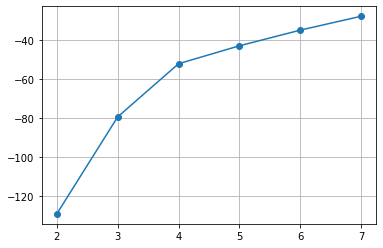

In [387]:
score=pd.DataFrame(scores)
plt.plot(score.iloc[:,0],score.iloc[:,1],'-o')
plt.grid()

In [388]:
dic = {0:'A', 1:'B', 2:'C', 4:'D'}

X_clasificado['Clase']=[dic.get(n, n) for n in X_clasificado['Grupo']]

In [389]:
X_clasificado = X_clasificado.drop('Grupo', axis=1)
X_clasificado.head()

,Lengua,Matemáticas,Clase
1,6.818661,8.471618,C
2,5.011015,5.248266,A
3,7.165759,6.203466,A
4,5.611792,9.999403,C
5,9.518010,6.604650,B


In [390]:
X_clasificado.to_excel('sample_data/notas_alumnos_clasificado.xlsx')